In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

in two dimensions.

In [5]:
from adr_2d.solver import Solver

In [6]:
import skimage as ski
import skimage.io

In [7]:
import time

In [21]:
num_points = 400

imax = num_points
jmax = num_points
kmax = 500
dt = 0.01

dr = 1./num_points

Let us create an interesting flow-field. It wil be similar to our experiment...

In [22]:
rot_speed1 = .01*dt
rot_speed2 = .01*dt
vortex1 = [imax/2, jmax/4]
vortex2 = [imax/2, 3*jmax/4]

In [23]:
v = np.zeros((imax, jmax), dtype=np.double) # right/left
u = np.zeros((imax, jmax), dtype=np.double) # down/up

In [24]:
xgrid = np.arange(0, imax)
ygrid = np.arange(0, jmax)

xmesh, ymesh = np.meshgrid(xgrid, ygrid)

In [25]:
v_field1 = -rot_speed1*(ymesh - vortex1[0])
u_field1 = rot_speed1*(xmesh - vortex1[1])

v_field2 = -rot_speed1*(ymesh - vortex2[0])
u_field2 = rot_speed1*(xmesh - vortex2[1])

v[:, 0:jmax/2] = v_field1[:, 0:jmax/2]
v[:, jmax/2:] = v_field2[:, jmax/2:]

u[:, 0:jmax/2] = u_field1[:, 0:jmax/2]
u[:, jmax/2:] = u_field2[:, jmax/2:]

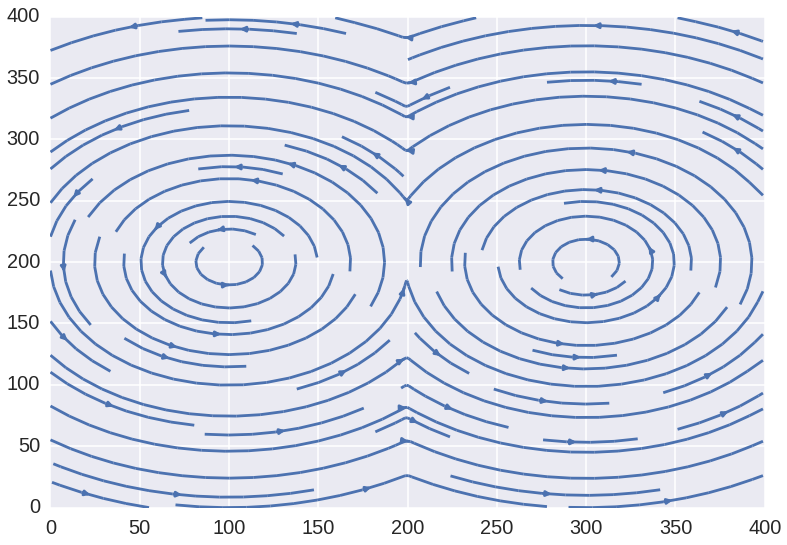

In [26]:
plt.streamplot(xmesh, ymesh, v, u)
plt.savefig('2d_example_flow.png', dpi=200, bbox_inches='tight')

Cool. Let's try this. The fluid should rotate every 10 iterations. We don't want the maximum speed to be greater than $dr/dt$...let's check that they are close at least.

In [27]:
#fi_orig = np.zeros((imax, jmax), dtype=np.double)
#fi_orig[47:53, 47:53] = 0.1
fi_orig = None

D = (.05*dr**2/dt)
s = 0.7

In [28]:
dr/dt

0.25

In [29]:
v.max()

0.02

In [30]:
u.max()

0.0099000000000000008

In [31]:
D

3.125e-05

We set the growth rate large and the diffusion constant small.

In [32]:
sol = Solver(imax=imax, jmax=jmax, kmax=kmax, dt=dt, use_morton=True, s=s,
            v=v, u=u, dr=dr, D=D, fi_orig = fi_orig)

Creating initial gaussian condition...
Done!
Creating advection operator...
Done!
Creating diffusion operator...
Done!


In [33]:
result = sol.run(record_images=False)

Done with iteration 0
Minimum (to check for stability): 0.0
Done with iteration 50
Minimum (to check for stability): -1.29082325412e-26
Done with iteration 100
Minimum (to check for stability): -4.48890886308e-18
Done with iteration 150
Minimum (to check for stability): -1.16941808297e-14
Done with iteration 200
Minimum (to check for stability): -1.5359008154e-12
Done with iteration 250
Minimum (to check for stability): -2.63750158618e-11
Done with iteration 300
Minimum (to check for stability): -3.42191340751e-10
Done with iteration 350
Minimum (to check for stability): -1.08407333785e-09
Done with iteration 400
Minimum (to check for stability): -2.75535509188e-09
Done with iteration 450
Minimum (to check for stability): -6.61237789084e-09


In [ ]:
colormap = sns.cubehelix_palette(n_colors=1024, as_cmap=True)

ski.io.imshow(result[:, :, 500], cmap=colormap)
plt.grid(False)
plt.clim([0, 1])

Cool.